In [42]:
# Import pandas
import pandas as pd
# For spliting
from sklearn.model_selection import train_test_split
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [43]:
# Load dataset
df = pd.read_excel('default of credit card clients.xls', header=1)

In [44]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [46]:
# Rename column PAY_0 to PAY_1
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
# Rename column 
df.rename(columns={'default payment next month':'def_pay'}, inplace=True)

In [47]:
# checking the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [48]:
df.isna().sum()    # check for missing values for surity

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [49]:
# Seperate X and y from dataset
df_X = df.drop(['def_pay'], axis=1)
df_y = df.def_pay

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)


# Logistic Regression

Hyperparameter Penalty
None, l1, l2

In [82]:
# Logistic Regression with l1 penalty
log_model1 = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000)
log_model1.fit(X_train, y_train)

y_pred = log_model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for log_model_1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5573
           1       0.24      0.73      0.36       427

    accuracy                           0.81      6000
   macro avg       0.61      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000

[[4567 1006]
 [ 116  311]]

Accuracy Score for model1:  0.813


In [83]:
# Logistic Regression with l2 penalty
log_model2 = LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000)
log_model2.fit(X_train, y_train)

y_pred = log_model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for log_model_2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


# Naive Bayes Algorithm

Try with many features and few features

In [84]:
# GNBayes
gnb_model1 = GaussianNB()
gnb_model1.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))


Accuracy Score for model1:  0.3795


## Compare Logistic and Naive Bayes

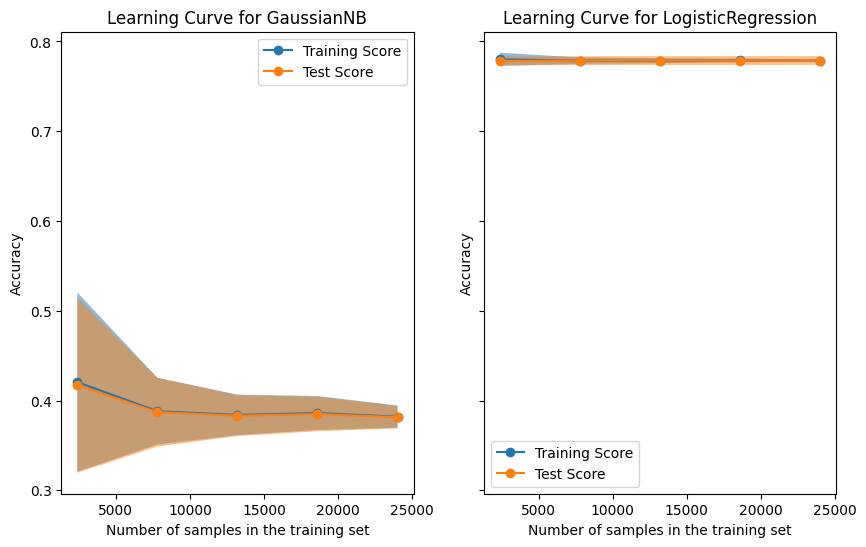

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": df_X,
    "y": df_y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gnb_model1, log_model2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

Generative Model for classification is not good. Lesson learnt from lectures

## Neural Network 

Baseline: 1 layer with 100 nodes  
Hyperparameter : Number of layers leads to more accurate results


In [86]:
# Import sk Neural network
from sklearn.neural_network import MLPClassifier

In [91]:
NN = MLPClassifier(hidden_layer_sizes=(50,),max_iter=200, tol=0.000000001, early_stopping=False, validation_fraction=0.2, n_iter_no_change=200)
# Train
NN.fit(X_train, y_train)
# Test
y_pred = NN.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the Results
print("#### Neural Network with 1 layer of 50 nodes #### ")
print("Accuracy for Neural Network is:",accuracy)
print("Confusion Matrix: ")
print(confusion_mat)
print("Classification Report: ")
print(classification_report(y_pred, y_test))

#### Neural Network with 1 layer of 50 nodes #### 
Accuracy for Neural Network is: 78.98333333333333
Confusion Matrix: 
[[4628   55]
 [1206  111]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      5834
           1       0.08      0.67      0.15       166

    accuracy                           0.79      6000
   macro avg       0.54      0.73      0.51      6000
weighted avg       0.96      0.79      0.86      6000



/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
len(NN.loss_curve_)

200

Text(0, 0.5, 'Loss')

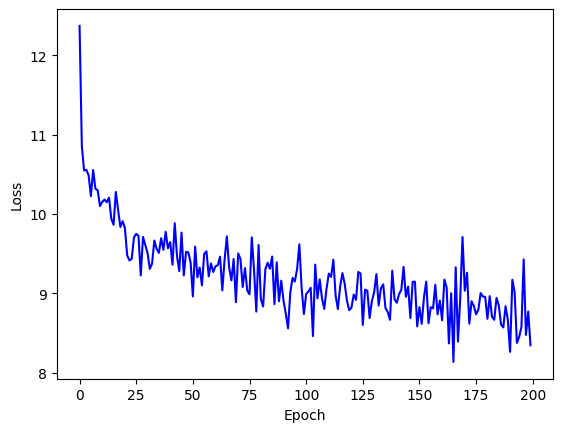

In [93]:
import matplotlib.pyplot as plt
plt.plot([epoch for epoch in range(200)], NN.loss_curve_, color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [72]:
NN2 = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, tol=0.000000001, early_stopping=False, validation_fraction=0.2, n_iter_no_change=200)
# Train
NN2.fit(X_train, y_train)
# Test
y_pred = NN2.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the Results
print("#### Neural Network with 2 layer of 50 nodes each #### ")
print("Accuracy for Neural Network is:",accuracy)
print("Confusion Matrix: ")
print(confusion_mat)
print("Classification Report: ")
print(classification_report(y_pred, y_test))

Accuracy for Neural Network is: 77.26666666666667
Confusion Matrix
[[4532  151]
 [1213  104]]


/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Loss')

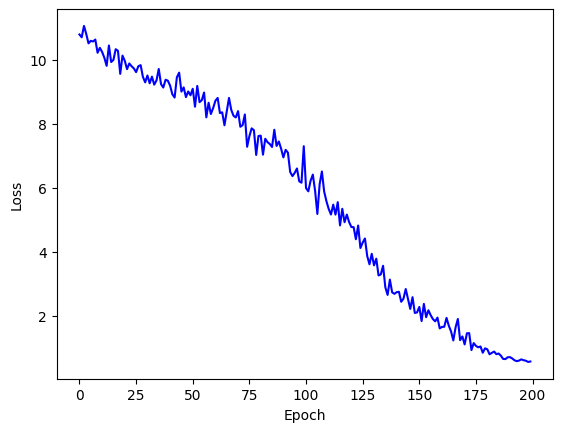

In [68]:
import matplotlib.pyplot as plt
plt.plot([epoch for epoch in range(200)], NN2.loss_curve_, color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [73]:
NN3 = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000, tol=0.000000001, early_stopping=False, validation_fraction=0.2, n_iter_no_change=200)
# Train
NN3.fit(X_train, y_train)
# Test
y_pred = NN3.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the Results
print("#### Neural Network with 3 layer of 50 nodes each #### ")
print("Accuracy for Neural Network is:",accuracy)
print("Confusion Matrix: ")
print(confusion_mat)
print("Classification Report: ")
print(classification_report(y_pred, y_test))

Accuracy for Neural Network is: 78.05
Confusion Matrix
[[4683    0]
 [1317    0]]


/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Loss')

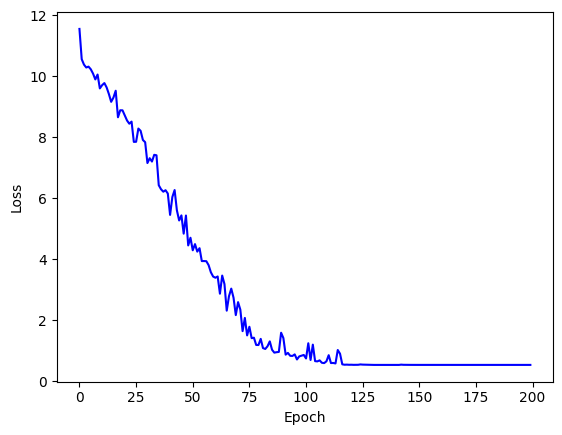

In [74]:
import matplotlib.pyplot as plt
plt.plot([epoch for epoch in range(200)], NN3.loss_curve_, color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.34273D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.21808D+08

At iterate   50    f=  3.96918D+03    |proj g|=  2.00098D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.34290D+08


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  3.96905D+03    |proj g|=  2.15239D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    123      1     0     0   2.152D+05   3.969D+03
  F =   3969.0483627637709     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  6.73622D+03    |proj g|=  2.35012D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31027D+09


 This problem is unconstrained.



At iterate  100    f=  6.73616D+03    |proj g|=  5.04327D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   5.043D+04   6.736D+03
  F =   6736.1638070460667     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.33145D+08

At iterate   50    f=  1.23452D+04    |proj g|=  4.39508D+05

At iterate   50    f=  1.20781D+03    |proj g|=  9.84837D+03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22354D+03    |proj g|=  2.60841D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.25055D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01482D+09

At iterate   50    f=  4.01080D+03    |proj g|=  8.76779D+04

At iterate  100    f=  1.23451D+04    |proj g|=  1.25918D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.13276D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01404D+09

At iterate   50    f=  9.56922D+03    |proj g|=  1.70573D+05

At iterate   50    f=  6.80866D+03    |proj g|=  1.38072D+05

At iterate  100    f=  1.22353D+03    |proj g|=  5.03892D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     88    111      1     0     0   1.242D+03   1.216D+03
  F =   1216.1294313782569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  3.98768D+03    |proj g|=  1.48159D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.30103D+08


 This problem is unconstrained.



At iterate   50    f=  6.76329D+03    |proj g|=  1.49177D+05

At iterate  100    f=  3.98766D+03    |proj g|=  1.82987D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   1.830D+04   3.988D+03
  F =   3987.6622905600752     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.54129D+03    |proj g|=  3.10853D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  6.76324D+03    |proj g|=  8.16126D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   8.161D+04   6.763D+03
  F =   6763.2428068975887     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.36348D+08

At iterate   50    f=  1.23031D+03    |proj g|=  8.76630D+04


At iterate   50    f=  9.57583D+03    |proj g|=  8.40051D+04
At iter

 This problem is unconstrained.



At iterate   50    f=  1.23730D+04    |proj g|=  5.95954D+04

At iterate  100    f=  9.57574D+03    |proj g|=  6.44422D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   6.444D+05   9.576D+03
  F =   9575.7409635823424     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  3.93224D+03    |proj g|=  3.00455D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.03245D+09

At iterate   50    f=  6.71170D+03    |proj g|=  9.65846D+04

At iterate  100    f=  1.23479D+04    |proj g|=  1.77781D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   1.778D+06   1.235D+04
  F =   12347.875904160350     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.23722D+04    |proj g|=  9.59934D+05

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10
At iterate    0    f=  1.66355D+03    |proj g|=  1.30395D+08

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.36075D+08

At iterate  100    f=  9.48416D+03    |proj g|=  3.42888D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    116      1     0     0   3.429D+05   9.484D+

 This problem is unconstrained.



At iterate   50    f=  3.94332D+03    |proj g|=  2.29013D+05

At iterate   50    f=  6.71750D+03    |proj g|=  5.26348D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     79     95      1     0     0   5.596D+03   3.943D+03
  F =   3943.2987420227787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.22376D+04    |proj g|=  2.93920D+05

At iterate  100    f=  6.71742D+03    |proj g|=  3.26692D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.21245D+03    |proj g|=  4.89913D+04

At iterate   50    f=  1.23105D+04    |proj g|=  2.47979D+05

At iterate  100    f=  1.22375D+04    |proj g|=  1.02318D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    114      1     0     0   1.023D+05   1.224D+04
  F =   12237.523185870643     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  9.52629D+03    |proj g|=  6.30665D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  1.23104D+04    |proj g|=  1.29779D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   1.298D+05   1.231D+04
  F =   12310.382978281952     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.35496D+08

At iterate   50    f=  3.97334D+03    |proj g|=  8.01365D+04

At iterate   50    f=  1.19289D+03    |proj g|=  5.32594D+03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01954D+09
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.24025D+08

At iterate   50    f=  6.81694D+03    |proj g|=  1.29656D+04

At iterate  100    f=  6.81664D+03    |proj g|=  6.49797D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.



At iterate   50    f=  3.99244D+03    |proj g|=  2.91724D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     75     92      1     0     0   7.943D+03   1.252D+03
  F =   1252.3298613294703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  3.99239D+03    |proj g|=  1.29990D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01992D+09
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31284D+09

At iterate   50    f=  9.56211D+03    |proj g|=  1.30973D+05

At iterate   50    f=  9.52815D+03    |proj g|=  6.95485D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.33445D+08

At iterate   50    f=  1.23270D+04    |proj g|=  1.62992D+05

At iterate   50    f=  6.71782D+03    |proj g|=  3.09329D+05

At iterate   50    f=  1.22573D+03    |proj g|=  7.80350D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     68     84      1     0     0   2.533D+03   1.226D+03
  F =   1225.7231884280598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  6.71775D+03    |proj g|=  6.42054D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   6.421D+04   6.718D+03
  F =   6717.7455485946830     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  3.94373D+03    |proj g|=  1.12778D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_


At iterate   50    f=  1.17854D+03    |proj g|=  4.23463D+04

At iterate  100    f=  1.17851D+03    |proj g|=  2.55445D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   2.554D+04   1.179D+03
  F =   1178.5117767737624     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  6.68846D+03    |proj g|=  3.34757D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22741D+04    |proj g|=  1.09423D+05

At iterate  100    f=  3.99702D+03    |proj g|=  3.54918D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   3.549D+05   3.997D+03
  F =   3997.0187300141088     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01896D+09

At iterate   50    f=  9.45197D+03    |proj g|=  1.69349D+05


 This problem is unconstrained.



At iterate   50    f=  9.54932D+03    |proj g|=  6.15760D+04

At iterate   50    f=  6.77180D+03    |proj g|=  7.09773D+04

At iterate  100    f=  1.22741D+04    |proj g|=  4.27055D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   4.271D+05   1.227D+04
  F =   12274.073028464736     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.54925D+03    |proj g|=  5.58708D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.25660D+08

At iterate  100    f=  3.99516D+03    |proj g|=  4.64406D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   4.644D+05   3.995D+03
  F =   3995.1586740941616     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  9.52901D+03    |proj g|=  2.19455D+05

At iterate   50    f=  1.23039D+04    |proj g|=  1.44176D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31981D+09

At iterate   50    f=  6.75991D+03    |proj g|=  2.86527D+05

At iterate  100    f=  9.52893D+03    |proj g|=  1.78665D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   1.787D+05   9.529D+03
  F =   9528.9253197849994     

STOP: T

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.25085D+08

At iterate   50    f=  1.22694D+03    |proj g|=  1.20315D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     74     89      1     0     0   4.196D+03   1.227D+03
  F =   1226.9378613806848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  3.99036D+03    |proj g|=  5.84816D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   5.848D+04   3.990D+03
  F =   3990.3597592390365     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01752D+09

At iterate  100    f=  1.23039D+04    |proj g|=  2.18540D+05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  1.23519D+03    |proj g|=  2.22661D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   2.227D+03   1.235D+03
  F =   1235.1943644874580     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.15176D+08

At iterate   50    f=  6.85665D+03    |proj g|=  1.46454D+05

At iterate   50    f=  1.23315D+04    |proj g|=  8.83351D+04

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01433D+09

At iterate  100    f=  4.03412D+03    |proj g|=  3.26951D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   3.270D+04   4.034D+03
  F =   4034.1188373247533     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.23716D+04    |proj g|=  1.22785D+06
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.28595D+08

At iterate   50    f=  3.99537D+03    |proj g|=  7.89868D+04

At iterate  100    f=  3.99529D+03    |proj g|=  4.24913D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   4.249D+04   3.995D+03
  F =   3995.2921898325762     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta


At iterate  100    f=  6.78093D+03    |proj g|=  2.86470D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   2.865D+05   6.781D+03
  F =   6780.9271742067385     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.23233D+04    |proj g|=  2.67668D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01935D+09

At iterate   50    f=  9.57749D+03    |proj g|=  1.68177D+05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32249D+09
RUNNING THE L-BFGS-B CODE

           * * *
RUNNING THE L-BFGS-B CODE

           * * *


Machine precision = 2.220D-16
 N =           25     M =           10
Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At X0         0 variables are exactly at the bounds


At iterate    0    f=  1.28925D+04    |proj g|=  1.01815D+09
At iterate    0    f=  9.14954D+03    |proj g|=  7.17586D+08

At iterate   50    f=  1.22534D+04    |proj g|=  6.64034D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS upd

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.31480D+08

At iterate   50    f=  1.21260D+03    |proj g|=  1.06399D+05

At iterate  100    f=  1.21259D+03    |proj g|=  3.23491D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   3.235D+04   1.213D+03
  F =   1212.5882778901562     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  4.01443D+03    |proj g|=  3.11636D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   3.116D+05   4.014D+03
  F =   4014.4309929748897     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.24760D+08

At iterate   50    f=  9.54830D+03    |proj g|=  5.85131D+04

At iterate   50    f=  6.78874D+03    |proj g|=  1.96983D+05

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.35045D+08

At iterate   50    f=  6.82280D+03    |proj g|=  2.86438D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32373D+09

At iterate   50    f=  1.20862D+03    |proj g|=  3.41559D+05

At iterate  100    f=  1.20836D+03    |proj g|=  3.53660D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  4.01150D+03    |proj g|=  2.37774D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   2.378D+05   4.011D+03
  F =   4011.4997634802685     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01542D+09

At iterate   50    f=  9.61509D+03    |proj g|=  2.17082D+05


 This problem is unconstrained.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:



At iterate  100    f=  9.61500D+03    |proj g|=  2.00645D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   2.006D+05   9.615D+03
  F =   9614.9993682015011     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31766D+09

At iterate   50    f=  6.82914D+03    |proj g|=  2.63097D+05

At iterate   50    f=  1.22932D+04    |proj g|=  2.53745D+05

At iter

 This problem is unconstrained.



At iterate  100    f=  1.23410D+04    |proj g|=  1.04069D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   1.041D+05   1.234D+04
  F =   12340.973981820152     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.42685D+08

At iterate   50    f=  1.16426D+03    |proj g|=  4.21244D+04

At iterate  100    f=  1.16423D+03    |proj g|=  4.15701D+03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.29768D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.02270D+09

At iterate   50    f=  6.75608D+03    |proj g|=  2.92396D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32213D+09

At iterate  100    f=  6.75601D+03    |proj g|=  2.57019D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS up

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  9.44876D+03    |proj g|=  6.98222D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    114      1     0     0   6.982D+04   9.449D+03
  F =   9448.7638361762147     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32293D+09

At iterate   50    f=  1.23263D+04    |proj g|=  2.78523D+05


 This problem is unconstrained.



At iterate   50    f=  1.22991D+04    |proj g|=  8.22806D+05

At iterate   50    f=  6.66949D+03    |proj g|=  4.40740D+05

At iterate  100    f=  1.22989D+04    |proj g|=  3.18019D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   3.180D+05   1.230D+04
  F =   12298.896295368948     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  9.55329D+03    |proj g|=  1.56382D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  6.66945D+03    |proj g|=  4.73572D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   4.736D+04   6.669D+03
  F =   6669.4516399378044     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  4.05692D+03    |proj g|=  3.87775D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  6.86416D+03    |proj g|=  6.64477D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   6.645D+04   6.864D+03
  F =   6864.1626363248788     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.23325D+04    |proj g|=  1.38002D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.26580D+08

At iterate   50    f=  1.25839D+03    |proj g|=  2.99934D+03

At iter

 This problem is unconstrained.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.27330D+08

At iterate   50    f=  9.63813D+03    |proj g|=  2.09074D+05

At iterate   50    f=  4.00531D+03    |proj g|=  2.10058D+04

At iterate  100    f=  9.55323D+03    |proj g|=  4.76160D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   4.762D+05   9.553D+03
  F =   9553.2268525198433     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.32133D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.02628D+09

At iterate    0    f=  1.66355D+04    |proj g|=  1.32207D+09

At iterate   50    f=  6.77044D+03    |proj g|=  7.53093D+04

At iterate   50    f=  1.23633D+03    |proj g|=  7.84040D+03

At iterate  100    f=  6.77041D+03    |proj g|=  2.01633D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segm

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22670D+04    |proj g|=  2.17594D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.00825D+09

At iterate   50    f=  6.81309D+03    |proj g|=  1.03439D+05


 This problem is unconstrained.



At iterate   50    f=  9.59614D+03    |proj g|=  4.10397D+05

At iterate  100    f=  6.80946D+03    |proj g|=  2.51303D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   2.513D+06   6.809D+03
  F =   6809.4567774293018     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  9.47479D+03    |proj g|=  7.64623D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.30119D+09

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   3.116D+05   1.227D+04
  F =   12266.877658842124     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.59600D+03    |proj g|=  5.01723D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   5.017D+05   9.596D+03
  F =   9595.9984307710565     

STOP: TOT

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.00131D+09

At iterate  100    f=  4.00109D+03    |proj g|=  1.00512D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   1.005D+04   4.001D+03
  F =   4001.0914189377754     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.47468D+03    |proj g|=  2.12255D+05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.30991D+09
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.31829D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.23829D+08

At iterate   50    f=  9.58027D+03    |proj g|=  7.46650D+04


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  3.99894D+03    |proj g|=  1.40903D+05

At iterate   50    f=  1.22988D+04    |proj g|=  2.45857D+05

At iterate  100    f=  3.99880D+03    |proj g|=  1.40626D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   1.406D+04   3.999D+03
  F =   3998.7953429346235     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.58024D+03    |proj g|=  4.86330D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31579D+09

At iterate   50    f=  9.58325D+03    |proj g|=  9.43543D+04

At iterate   50    f=  6.80921D+03    |proj g|=  8.67606D+04

At iterate   50    f=  1.19610D+03    |proj g|=  2.56097D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     71     84      1     0     0   3.922D+04   6.809D+03
  F =   6809.0933681719234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.36520D+08

At iterate   50    f=  1.23478D+04    |proj g|=  1.01261D+05

At iterate   50    f=  3.95449D+03    |proj g|=  1.72066D+05

At iterate  100    f=  1.23478D+04    |proj g|=  3.39035D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   3.390D+05   1.235D+04
  F =   12347.803146422482     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.46241D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.04583D+09

At iterate  100    f=  1.19219D+03    |proj g|=  6.44695D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   6.447D+03   1.192D+

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.31350D+08

At iterate   50    f=  9.42986D+03    |proj g|=  3.13291D+05

At iterate  100    f=  6.68161D+03    |proj g|=  1.09473D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   1.095D+05   6.682D+03
  F =   6681.6131771061100     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   50    f=  6.82288D+03    |proj g|=  8.37743D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     60     75      1     0     0   1.553D+04   6.823D+03
  F =   6822.8729634348729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31587D+09


 This problem is unconstrained.



At iterate   50    f=  1.22692D+04    |proj g|=  5.42678D+05

At iterate   50    f=  1.19705D+03    |proj g|=  1.11320D+04

At iterate   50    f=  9.57824D+03    |proj g|=  5.31526D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     62     78      1     0     0   1.316D+04   1.227D+04
  F =   12269.120119841291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.23570D+04    |proj g|=  1.17847D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   50    f=  1.21022D+03    |proj g|=  1.37739D+05

At iterate  100    f=  9.57759D+03    |proj g|=  9.98074D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    127      1     0     0   9.981D+05   9.578D+03
  F =   9577.5875839387772     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.36210D+08

At iterate  100    f=  1.21019D+03    |proj g|=  3.18770D+03

       

 This problem is unconstrained.
 This problem is unconstrained.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.40500D+08

At iterate  100    f=  1.23562D+04    |proj g|=  6.91078D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   6.911D+05   1.236D+04
  F =   12356.184413745976     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  3.95316D+03    |proj g|=  1.24199D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   1.242D+05   3.953D+03
  F =   3953.1561281983604     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  6.70649D+03    |proj g|=  5.67030D+04

At iterate   50    f=  1.23003D+04    |proj g|=  6.19815D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.32143D+08


 This problem is unconstrained.



At iterate   50    f=  1.23024D+03    |proj g|=  2.73314D+03

At iterate  100    f=  6.70641D+03    |proj g|=  6.56642D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   6.566D+05   6.706D+03
  F =   6706.4093629543249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.29681D+08

At iterate  100    f=  1.23016D+03    |proj g|=  2.59826D+05

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  3.98999D+03    |proj g|=  1.47197D+05

At iterate  100    f=  1.23002D+04    |proj g|=  2.29175D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   2.292D+05   1.230D+04
  F =   12300.233127603291     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.26086D+08

At iterate   50    f=  9.52859D+03    |proj g|=  1.18595D+04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  3.98996D+03    |proj g|=  1.90046D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   1.900D+04   3.990D+03
  F =   3989.9561328482250     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  6.75612D+03    |proj g|=  9.96143D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32173D+09
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  4.00315D+03    |proj g|=  1.84852D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   1.849D+04   4.003D+03
  F =   4003.1478199915073     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.19875D+03    |proj g|=  4.45795D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01343D+09

At iterate   50    f=  6.80465D+03    |proj g|=  3.26436D+05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     71     87      1     0     0   1.264D+04   6.805D+03
  F =   6804.6050289458490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  9.62416D+03    |proj g|=  3.75165D+04

At iterate  100    f=  1.23361D+04    |proj g|=  4.89942D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.36480D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     85    100      1     0     0   2.074D+03   1.199D+03
  F =   1198.7231398298859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  3.94845D+03    |proj g|=  1.51193D+04

At iterate   50    f=  1.21478D+03    |proj g|=  3.63591D+03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT


At iterate   50    f=  9.51828D+03    |proj g|=  5.16630D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.34255D+08


 This problem is unconstrained.



At iterate   50    f=  1.21884D+03    |proj g|=  3.60605D+04

At iterate  100    f=  9.51825D+03    |proj g|=  2.45896D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   2.459D+05   9.518D+03
  F =   9518.2528081184737     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.22361D+08

At iterate  100    f=  1.21883D+03    |proj g|=  1.00946D+04

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.15206D+08

At iterate   50    f=  4.08086D+03    |proj g|=  4.61966D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     66     81      1     0     0   3.700D+03   4.081D+03
  F =   4080.8521375083387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   50    f=  1.22392D+04    |proj g|=  2.43658D+04

At iterate   50    f=  6.86198D+03    |proj g|=  4.30085D+04

At iterate   50    f=  9.57022D+03    |proj g|=  1.15037D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     80     96      1     0     0   9.697D+03   9.570D+03
  F =   9570.1808805999990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32104D+09


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     63     76      1     0     0   1.519D+05   1.224D+04
  F =   12239.189249824161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.23140D+04    |proj g|=  2.33264D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     65     82      1     0     0   4.101D+04   1.231D+04
  F =   12313.983861305725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.34936D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.23271D+04    |proj g|=  1.46392D+05

At iterate   50    f=  6.74926D+03    |proj g|=  1.07049D+05

At iterate   50    f=  1.22602D+03    |proj g|=  4.09372D+04

At iterate  100    f=  1.23261D+04    |proj g|=  5.70064D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   5.701D+05   1.233D+04
  F =   12326.085000959181     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  4.01774D+03    |proj g|=  4.60275D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32552D+09

At iterate   50    f=  6.79403D+03    |proj g|=  1.79924D+04

At iterate  100    f=  6.79396D+03    |proj g|=  4.20369D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   4.204D+05   6.794D+03
  F =   6793.9606412183775     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  9.51678D+03    |proj g|=  2.96303D+04

At iterate  100    f=  1.21122D+03    |proj g|=  8.49720D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   8.497D+03   1.211D+03
  F =   1211.2163020856246     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.25260D+08

At iterate   50    f=  1.22741D+04    |proj g|=  2.68043D+05

At iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter


At iterate  100    f=  4.00148D+03    |proj g|=  2.50246D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   2.502D+04   4.001D+03
  F =   4001.4848584517549     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.51438D+03    |proj g|=  7.93328D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.18485D+03    |proj g|=  1.13096D+05

At iterate   50    f=  1.22789D+04    |proj g|=  3.73591D+05

At iterate  100    f=  1.18477D+03    |proj g|=  5.44697D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   5.447D+03   1.185D+03
  F =   1184.7723023950075     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  9.48132D+03    |proj g|=  9.84581D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate  100    f=  1.22789D+04    |proj g|=  1.81118D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   1.811D+05   1.228D+04
  F =   12278.868198775655     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  6.76963D+03    |proj g|=  1.14425D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.74797D+03    |proj g|=  3.38445D+05

At iterate  100    f=  9.48093D+03    |proj g|=  4.28901D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   4.289D+05   9.481D+03
  F =   9480.9279328542725     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO


At iterate   50    f=  1.26713D+03    |proj g|=  1.07831D+04

At iterate   50    f=  9.53417D+03    |proj g|=  4.33468D+04

At iterate  100    f=  1.26712D+03    |proj g|=  8.61550D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   8.615D+03   1.267D+03
  F =   1267.1249416493299     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.25760D+08


 This problem is unconstrained.



At iterate  100    f=  6.76214D+03    |proj g|=  1.64952D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   1.650D+06   6.762D+03
  F =   6762.1425053898120     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.23248D+04    |proj g|=  2.37530D+05

At iterate  100    f=  9.53396D+03    |proj g|=  2.00711D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  9.50453D+03    |proj g|=  5.53135D+05

At iterate  100    f=  3.97247D+03    |proj g|=  6.57987D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   6.580D+04   3.972D+03
  F =   3972.4734564211985     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.35185D+08

At iterate  100    f=  1.23245D+04    |proj g|=  1.67187D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   1.672D+06   1.232D+04
  F =   12324.544946462222     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   50    f=  1.23060D+04    |proj g|=  3.26730D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     86    101      1     0     0   1.583D+03   1.218D+03
  F =   1217.6070502787013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.39939D+08

At iterate   50    f=  3.94653D+03    |proj g|=  3.01402D+05


 This problem is unconstrained.



At iterate   50    f=  6.71242D+03    |proj g|=  1.63387D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     78     92      1     0     0   5.287D+03   3.946D+03
  F =   3946.4996740537849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.02725D+09

At iterate  100    f=  1.23059D+04    |proj g|=  8.79623D+04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.67406D+03    |proj g|=  1.92495D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32137D+09

At iterate   50    f=  9.49553D+03    |proj g|=  3.06232D+05

At iterate  100    f=  6.67402D+03    |proj g|=  3.87096D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   3.871D+04   6.674D+03
  F =   6674.0242406377847     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22877D+04    |proj g|=  1.69755D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.20806D+08

At iterate  100    f=  9.49515D+03    |proj g|=  2.33433D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   2.334D+05   9.495D+03
  F =   9495.1546726657089     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate  100    f=  1.22876D+04    |proj g|=  2.16466D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   2.165D+05   1.229D+04
  F =   12287.617116382769     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *


 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  6.83783D+03    |proj g|=  5.58076D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   5.581D+05   6.838D+03
  F =   6837.8284693274118     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  4.03618D+03    |proj g|=  1.27297D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.35665D+08

At iterate   50    f=  9.61756D+03    |proj g|=  3.25663D+05


 This problem is unconstrained.



At iterate   50    f=  1.23654D+04    |proj g|=  4.19554D+05

At iterate   50    f=  1.22378D+03    |proj g|=  1.38133D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     74     88      1     0     0   4.280D+04   4.036D+03
  F =   4036.1764587180846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.86374D+03    |proj g|=  7.36347D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31312D+09

At iterate   50    f=  9.59785D+03    |proj g|=  6.99189D+05


 This problem is unconstrained.



At iterate  100    f=  6.86108D+03    |proj g|=  4.71893D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    116      1     0     0   4.719D+05   6.861D+03
  F =   6861.0794357361110     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.31475D+08

At iterate  100    f=  9.59773D+03    |proj g|=  8.59581D+04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.37775D+08

At iterate   50    f=  3.95574D+03    |proj g|=  1.04809D+05

At iterate   50    f=  1.22127D+03    |proj g|=  1.29391D+05

At iterate  100    f=  3.95569D+03    |proj g|=  2.13106D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   2.131D+04   3.956D+03
  F =   3955.6929335375826     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.82587D+03    |proj g|=  2.26401D+05

At iterate  100    f=  4.06992D+03    |proj g|=  4.60195D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   4.602D+04   4.070D+03
  F =   4069.9227624988130     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  9.59265D+03    |proj g|=  8.79611D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31187D+09

At iterate  100    f=  1.23875D+04    |proj g|=  6.55657D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   6.557D+05   1.239D+04
  F =   12387.457167602151     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.22218D+03    |proj g|=  3.83636D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.02270D+09

At iterate   50    f=  3.99342D+03    |proj g|=  1.41129D+05

At iterate  100    f=  3.99341D+03    |proj g|=  5.77468D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   5.775D+04   3.993D+03
  F =   3993.4082471956112     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.21828D+03    |proj g|=  2.47941D+04

At iterate   50    f=  1.23622D+04    |proj g|=  1.01951D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     87    102      1     0     0   7.004D+03   1.218D+03
  F =   1218.2618358533416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  6.77419D+03    |proj g|=  9.36447D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  3.99179D+03    |proj g|=  2.95139D+04

At iterate   50    f=  6.71439D+03    |proj g|=  5.44746D+04

At iterate  100    f=  1.23614D+04    |proj g|=  6.12171D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   6.122D+05   1.236D+04
  F =   12361.430298428719     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.23460D+04    |proj g|=  2.73209D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_mod

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.02211D+09

At iterate  100    f=  3.99176D+03    |proj g|=  5.35028D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   5.350D+04   3.992D+03
  F =   3991.7635973851302     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.21803D+03    |proj g|=  3.71200D+04

At iterate   50    f=  3.96094D+03    |proj g|=  6.11535D+04

At iterate  100    f=  1.21802D+03    |proj g|=  2.76317D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   2.763D+04   1.218D+03
  F =   1218.0191967138633     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.33534D+08

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.74234D+03    |proj g|=  3.86906D+04

At iterate   50    f=  9.52256D+03    |proj g|=  1.34778D+05

At iterate   50    f=  1.23413D+04    |proj g|=  2.76982D+05

At iterate   50    f=  9.54665D+03    |proj g|=  1.38717D+04

At iterate  100    f=  6.74207D+03    |proj g|=  1.50836D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    118      1     0     0   1.508D+06   6.742D+03
  F =   6742.0749688599753     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta


At iterate   50    f=  1.20925D+03    |proj g|=  9.76729D+03

At iterate  100    f=  1.23413D+04    |proj g|=  1.57333D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   1.573D+05   1.234D+04
  F =   12341.259533218119     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22652D+04    |proj g|=  1.76829D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.34791D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.03308D+09

At iterate   50    f=  3.96815D+03    |proj g|=  9.67489D+03

At iterate  100    f=  1.22650D+04    |proj g|=  7.17189D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.23752D+03    |proj g|=  3.00473D+04

At iterate   50    f=  1.23110D+04    |proj g|=  9.06499D+04

At iterate   50    f=  9.50419D+03    |proj g|=  7.53042D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     73     89      1     0     0   3.782D+03   1.238D+03
  F =   1237.5099507743560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.30155D+08

At iter

 This problem is unconstrained.



At iterate  100    f=  1.23108D+04    |proj g|=  3.49218D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   3.492D+05   1.231D+04
  F =   12310.830139374561     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.24403D+08

At iterate   50    f=  4.01850D+03    |proj g|=  3.97935D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  9.50411D+03    |proj g|=  8.23493D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    123      1     0     0   8.235D+05   9.504D+03
  F =   9504.1140620960778     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  4.01846D+03    |proj g|=  3.77724D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmut


At iterate  100    f=  9.57872D+03    |proj g|=  3.44877D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    119      1     0     0   3.449D+05   9.579D+03
  F =   9578.7152779869375     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  1.22443D+03    |proj g|=  1.21843D+04

At iterate   50    f=  6.78477D+03    |proj g|=  2.22987D+05

At iterate   50    f=  1.23824D+04    |proj g|=  2.17300D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  1.22439D+03    |proj g|=  1.81411D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    122      1     0     0   1.814D+05   1.224D+03
  F =   1224.3943369726451     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.11443D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+03    |proj g|=  1.27725D+08

At iterate  100    f=  6.86714D+03    |proj g|=  1.60262D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    121      1     0     0   1.603D+05   6.867D+03
  F =   6867.1444715046646     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.62612D+03    |proj g|=  1.01267D+06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate  100    f=  1.23175D+04    |proj g|=  3.24817D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   3.248D+05   1.232D+04
  F =   12317.538543224555     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate   50    f=  3.97279D+03    |proj g|=  5.98479D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.03268D+09

At iterate   50    f=  1.25186D+03    |proj g|=  1.87119D+04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.77169D+03    |proj g|=  3.73512D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32273D+09

At iterate   50    f=  9.49322D+03    |proj g|=  2.06706D+04

At iterate  100    f=  9.49288D+03    |proj g|=  1.76357D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value


At iterate  100    f=  6.77165D+03    |proj g|=  5.35563D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  4.03384D+03    |proj g|=  1.08877D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     69     87      1     0     0   6.798D+03   4.034D+03
  F =   4033.8336969351499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  1.21877D+03    |proj g|=  2.60051D+04

At iterate  100    f=  1.22926D+04    |proj g|=  3.49260D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31645D+09

At iterate  100    f=  1.21876D+03    |proj g|=  1.14837D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   1.148D+03   1.219D+03
  F =   1218.7601291567978     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   50    f=  9.57766D+03    |proj g|=  7.80965D+04

At iterate   50    f=  1.19206D+03    |proj g|=  2.46081D+04

At iterate   50    f=  6.79697D+03    |proj g|=  1.19158D+05

At iterate   50    f=  1.22960D+04    |proj g|=  6.45446D+05

At iterate  100    f=  9.57758D+03    |proj g|=  2.30423D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    123      1     0     0   2.304D+05   9.578D+03
  F =   9577.5838550598346     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  3.99953D+03    |proj g|=  1.26789D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.27024D+08

At iterate  100    f=  3.99942D+03    |proj g|=  1.28128D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   1.281D+05   3.999D+03
  F =   3999.4171808820656     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.22959D+04    |proj g|=  1.73438D+05

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.31828D+09

At iterate   50    f=  6.73832D+03    |proj g|=  1.02172D+05

At iterate   50    f=  9.55303D+03    |proj g|=  1.72335D+05

At iterate  100    f=  6.79695D+03    |proj g|=  1.41648D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    123      1     0     0   1.416D+05   6.797D+03
  F =   6796.9547456885748     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.22881D+04    |proj g|=  9.50434D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.23583D+08

At iterate   50    f=  4.03234D+03    |proj g|=  1.39099D+04

At iterate  100    f=  4.03138D+03    |proj g|=  1.86087D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    116      1     0     0   1.861D+06   4.031D+03
  F =   4031.3786615109334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  6.80735D+03    |proj g|=  7.42693D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     51     70      1     0     0   7.428D+03   6.807D+03
  F =   6807.3522959957454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66355D+04    |proj g|=  1.32283D+09

At iterate   50    f=  9.58279D+03    |proj g|=  2.36750D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:



At iterate  100    f=  9.58271D+03    |proj g|=  1.05753D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    124      1     0     0   1.058D+05   9.583D+03
  F =   9582.7146526964825     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40655D+03    |proj g|=  4.26881D+08

At iterate   50    f=  1.20887D+03    |proj g|=  4.78762D+04


 This problem is unconstrained.



At iterate   50    f=  1.23006D+04    |proj g|=  6.87034D+05

At iterate   50    f=  4.00041D+03    |proj g|=  3.61675D+04

At iterate  100    f=  1.20882D+03    |proj g|=  5.89879D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   5.899D+03   1.209D+03
  F =   1208.8223491132671     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14954D+03    |proj g|=  7.22126D+08

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28925D+04    |proj g|=  1.01900D+09

At iterate  100    f=  1.25065D+03    |proj g|=  1.89818D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    117      1     0     0   1.898D+04   1.251D+03
  F =   1250.6470399799948     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   50    f=  6.76219D+03    |proj g|=  1.53788D+05

At iterate  100    f=  1.23004D+04    |proj g|=  4.12926D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    100    120      1     0     0   4.129D+05   1.230D+04
  F =   12300.373251307303     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  9.51782D+03    |proj g|=  7.05839D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at

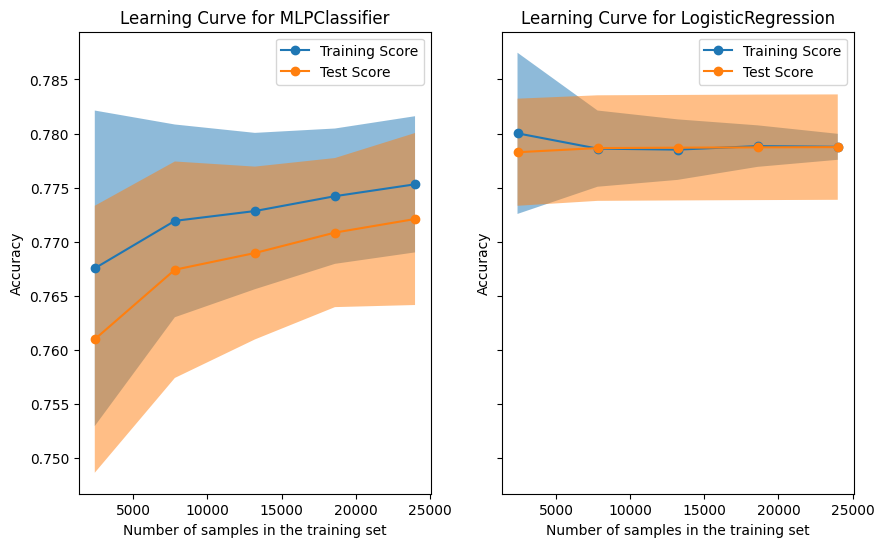

/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/cshome/nmuthura/Work/cmput660/senv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": df_X,
    "y": df_y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([NN, log_model2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")